# <center>An Analysis on the Effects of Noise on Training Machine Learning Models</center>
<center>Austin Koenig</center>

## Introduction

<br>
This section explains the motivation for this piece as well as describing the packages used in the analysis.

In [1]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
import sklearn.ensemble as skle

from keras import models
from keras import layers
from keras import optimizers

%matplotlib inline
np.random.seed(12)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

Using TensorFlow backend.


In [2]:
%%html
<style>
table {align:center;display:block}
</style>

## Data Generation
<br>
Since the focus of this post is measuring the effect of noise in training data, we will be controlling the noise of such data. All data will originate from the value of a sine wave on the domain $[-2\pi,2\pi]$; however, noise will be introduced into the training data using `d`, what we will call the *degree of noise*. The training data will come from a normal distribution centered around the true sine value with standard deviation `d`.  

<br>

<center>
Variable Dictionary

| Variable Name | Description |
| :---: | :--- |
| `N` | Total Number of Samples |
| `nd` | Number of Degrees of Noise |
| `noise` | Degree of Noise |
| `domain` | $[-2\pi,2\pi]$ |
| `raw_sine` | True Sine Value |
| `sine` | Sine Value Plus Noise |
 
</center>

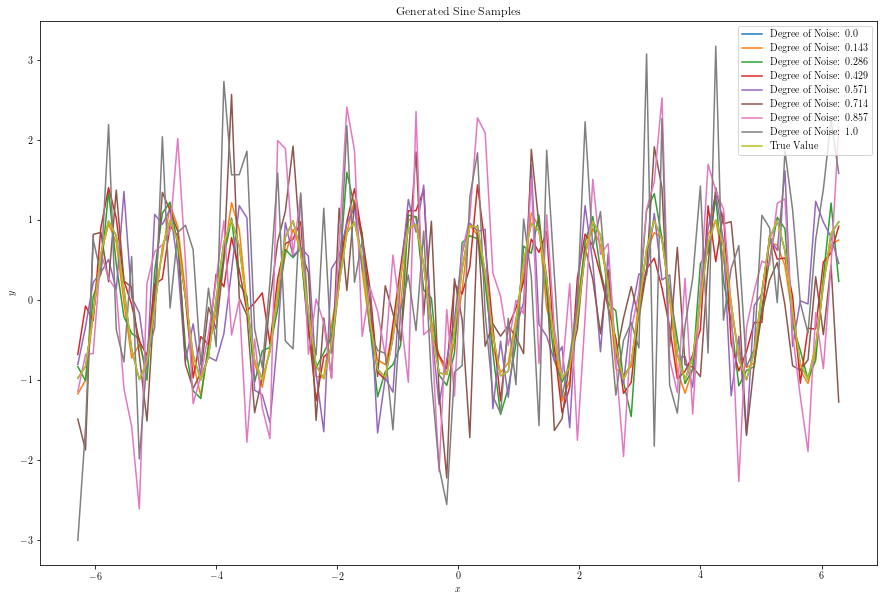

In [3]:
N = 100 # number of samples
nd = 8 # number of degrees of noise
noise = np.linspace(1e-4, 1, nd) # degree of noise
domain = np.linspace(-2 * np.pi, 2 * np.pi, N) # domain of study
raw_sine = np.sin(2 * np.pi * domain) # true sine value
sine = [np.random.normal(raw_sine, i) for i in noise]

f1 = plt.figure(figsize = (15, 10))
a1 = f1.add_subplot(111)

for s in range(len(sine)):
    a1.plot(domain, sine[s], label = f'Degree of Noise: {round(noise[s], 3)}')
a1.plot(domain, raw_sine, label = 'True Value')
a1.set_xlabel(r'$x$')
a1.set_ylabel(r'$y$')
a1.title.set_text(r'Generated Sine Samples')
a1.legend()

plt.show()

This visualization is not meant to deliver any precise information. It is meant to inspire the simple observation that as the degree of noise increases, our curve becomes more wild. This project aims at measuring the effect of this "wildness" on a set of machine learning models. The models explored here are:

- [Random Forest Regressor](#random_forest)
- [One-Dimensional Convolutional Neural Network](#conv1d)
- [Long Short Term Memory (LSTM) Recurrent Neural Network](#lstm)

<br>
<br>

## Plan of Action

<br>
For each type of model we are using, we will create, train, and test eight different models (one for each degree of noise). Then, we will examine each model's performance not only relative to the training progression (number of epochs; or, number of trees in the case of random forest), but also against the degree of noise. Finally, there will be a debriefing of the results and an evaluation of my hypothesis.

<br>
<br>

## Hypothesis

<br>
I hereby propose a hypothesis of our results. I anticipate that due to the cyclic nature of trigonometric functions, our LSTM would outperform the others. However, since our data originates from a perfect sine function, we may find that the "memory" gained by using a LSTM model is not completely necessary to handle the simplicity of the trends in the curve. Since the data is only artificially influenced by stochastic noise and the deterministic noise is controlled, we may instead see the convolutional neural network become the champion.

<br>

<a id='random_forest'></a>
## Baseline Model: Random Forest Regressor

<br>

Some stuff on random forests.

In [5]:
nforests = 15
nestimators = np.linspace(50, 200, nforests, dtype = int)
rfmodels = [skle.RandomForestRegressor(n_estimators = i, max_depth = 8) for i in nestimators]
rfpredictions = np.ndarray((N, nforests, nd)) # 3d array of predictions
rferrors = np.ndarray((N, nforests, nd)) # 3d array of errors
for n in range(len(noise)):
    for m in range(len(rfmodels)):
        rfmodels[m].fit(np.reshape(domain, (domain.shape[0],1)), sine[n])
        rfpredictions[:, m, n] = rfmodels[m].predict(np.reshape(domain, (domain.shape[0],1)))
        rferrors[:, m, n] = (rfpredictions[:, m, n] - raw_sine) ** 2


<a id='dnn'></a>
## Deep Neural Networks

This section will explore the deep neural networks that were mentioned at the beginning of this report.

<br>
<br>

<a id='conv1d'></a>
### One-Dimensional Convolutional Neural Network
<br>
Some stuff on 1D Conv Nets.

<a id='lstm'></a>
### Long Short Term Memory (LSTM) Recurrent Neural Network
<br>
Some stuff on LSTM RNNs.

## Results



In [ ]:
# plot losses of all models here

## Conclusion

Some concluding statements about model performance with respect to noise as well as the implications of the results.